<a href="https://colab.research.google.com/github/bermudezfc/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset


In [5]:
## converts csv file to dataframe
df = pd.read_csv('iris.csv')


In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.value_counts()

,,,,,,count
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
95,5.6,2.7,4.2,1.3,Iris-versicolor,1
97,5.7,2.9,4.2,1.3,Iris-versicolor,1
98,6.2,2.9,4.3,1.3,Iris-versicolor,1
99,5.1,2.5,3.0,1.1,Iris-versicolor,1
...,...,...,...,...,...,...
51,7.0,3.2,4.7,1.4,Iris-versicolor,1
52,6.4,3.2,4.5,1.5,Iris-versicolor,1
53,6.9,3.1,4.9,1.5,Iris-versicolor,1


In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
df.drop(columns= 'Id', inplace= True)

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df['Species'].value_counts()
## specify the column

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


3. Visualize the dataset

##Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

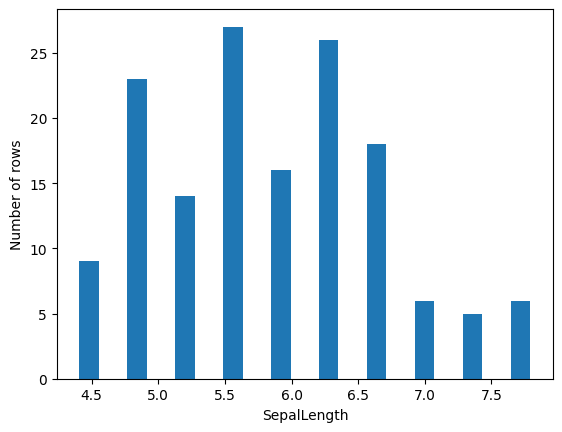

In [18]:
plt.hist(df['SepalLengthCm'], rwidth= 0.4)
plt.xlabel('SepalLength')
plt.ylabel('Number of rows')
plt.show

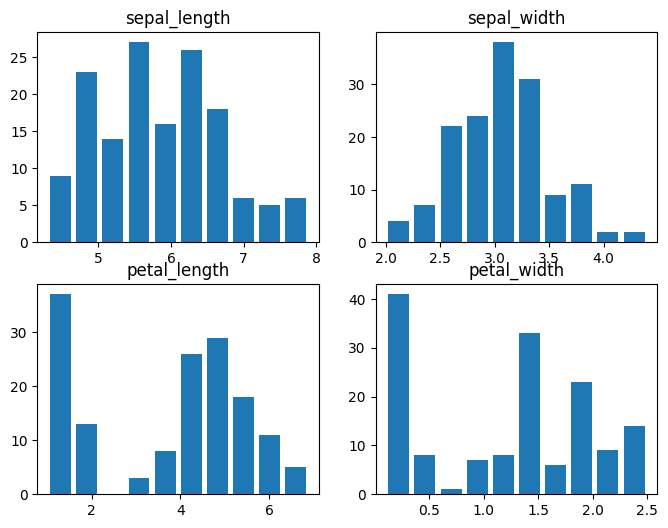

In [30]:
fig, ax = plt.subplots(2,2, figsize=(8,6))

ax[0, 0].hist(df["SepalLengthCm"], rwidth= 0.8)
ax[0, 1].hist(df["SepalWidthCm"], rwidth= 0.8)
ax[1, 0].hist(df["PetalLengthCm"], rwidth= 0.8)
ax[1, 1].hist(df["PetalWidthCm"], rwidth= 0.8)

ax[0, 0].set_title("sepal_length")
ax[0, 1].set_title("sepal_width")
ax[1, 0].set_title("petal_length")
ax[1, 1].set_title("petal_width")

plt.show()


Scatter Plot

In [26]:
colors = {'Iris-setosa': 'red',
          'Iris-virginica': 'blue',
          'Iris-versicolor': 'green'}

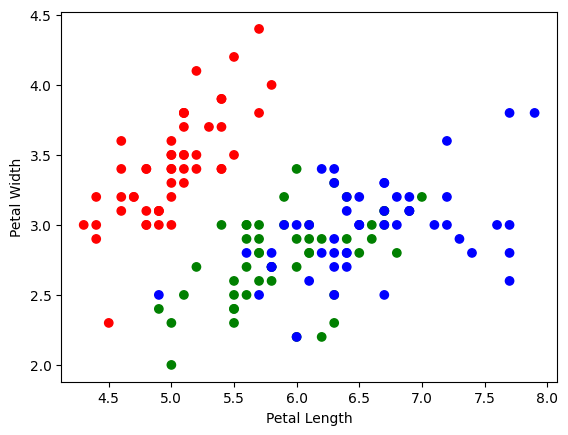

In [27]:
plt.scatter(df["SepalLengthCm"],
            df["SepalWidthCm"],
            c=df['Species'].map(colors))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


In [28]:
colors = {'Iris-setosa': 'yellow',
          'Iris-virginica': 'red',
          'Iris-versicolor': 'blue'}

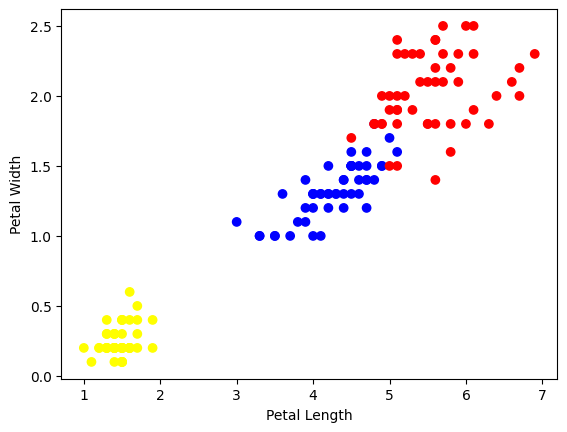

In [29]:
plt.scatter(df["PetalLengthCm"],
            df["PetalWidthCm"],
            c=df['Species'].map(colors))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

4. Split the dataset into a training set and a testing set

In [31]:
#Array of features
X = df.drop(columns=['Species']).values

# Array of Labels
y = df['Species'].values

In [33]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [34]:
X.shape

(150, 4)

In [35]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [36]:
y.shape

(150,)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [39]:
print(X_train)

[[5.1 3.4 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.7 2.6 3.5 1. ]
 [5.4 3.7 1.5 0.2]
 [7.  3.2 4.7 1.4]
 [5.  3.3 1.4 0.2]
 [5.  3.5 1.6 0.6]
 [7.7 3.  6.1 2.3]
 [5.  3.5 1.3 0.3]
 [6.4 3.2 5.3 2.3]
 [5.8 2.7 5.1 1.9]
 [5.6 2.5 3.9 1.1]
 [5.1 3.5 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [6.5 2.8 4.6 1.5]
 [6.2 2.8 4.8 1.8]
 [5.9 3.  4.2 1.5]
 [6.7 3.3 5.7 2.1]
 [7.7 3.8 6.7 2.2]
 [5.4 3.4 1.7 0.2]
 [6.3 2.5 5.  1.9]
 [5.  3.2 1.2 0.2]
 [4.6 3.4 1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [5.2 3.4 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.7 1. ]
 [5.1 2.5 3.  1.1]
 [5.9 3.  5.1 1.8]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.2 2. ]
 [6.5 3.  5.8 2.2]
 [6.9 3.1 4.9 1.5]
 [4.6 3.6 1.  0.2]
 [6.6 3.  4.4 1.4]
 [4.9 3.1 1.5 0.1]
 [6.7 3.  5.  1.7]
 [6.7 3.  5.2 2.3]
 [5.6 2.9 3.6 1.3]
 [6.3 3.4 5.6 2.4]
 [5.6 2.7 4.2 1.3]
 [6.1 3.  4.9 1.8]
 [6.3 2.3 4.4 1.3]
 [5.8 2.6 4.  1.2]
 [5.7 3.  4.2 1.2]
 [6.9 3.1 5.4 2.1]
 [6.8 2.8 4.8 1.4]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [4.3 3.  1.1 0.1]
 [4.8 3.4 1.9 0.2]
 [5.2 2.7 3.

5. Train the model

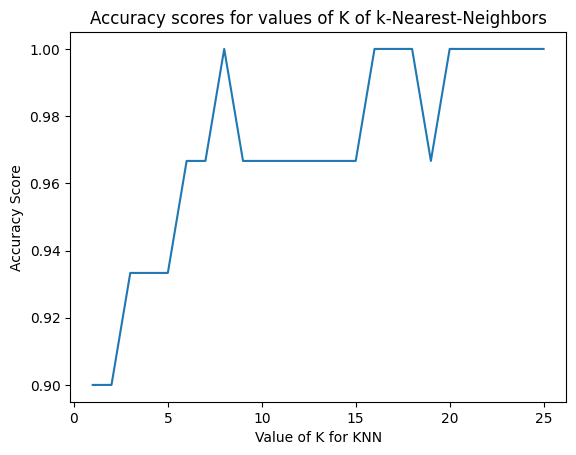

In [40]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)

  #Train the model
  knn.fit(X_train, y_train)

  #Test the model
  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy scores for values of K of k-Nearest-Neighbors')
plt.show()

In [42]:

  knn = KNeighborsClassifier(n_neighbors=13)

  #Train the model
  knn.fit(X_train, y_train)

  #Test the model
  y_pred = knn.predict(X_test)
  metrics.accuracy_score(y_test, y_pred)



0.9666666666666667

In [ ]:
# put your answer here

6. Test the model

In [43]:
knn.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)

In [ ]:
# put your answer here